In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, SimpleRNN, LSTM, Dense
from tensorflow.keras.optimizers import Adam
import joblib
import h5py


import matplotlib.pyplot as plt

In [2]:
data_path = r'C:\Users\82102\Desktop\work'

df=pd.read_csv('C:\\Users\\82102\\Desktop\\work\\data\\data_current.csv')

X = df[['cb_data_Ampere_1','cb_data_Ampere_2','cb_data_Watt']]
y = df['Pattern Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_save_model(X_train, y_train, model_save_path):
    # RandomForestClassifier 모델 초기화 및 학습
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # 모델 저장
    joblib.dump(model, model_save_path)

    # 테스트 데이터로 예측
    y_pred = model.predict(X_test)

    # 정확도 및 분류 보고서 출력
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

def model_to_h5(model_save_path, h5_save_path):
    # 모델 불러오기
    model = joblib.load(model_save_path)

    # H5 파일로 저장
    with h5py.File(h5_save_path, 'w') as hf:
        for key, value in model.__dict__.items():
            try:
                hf.create_dataset(key, data=value)
            except TypeError:
                pass


# 모델 학습 및 저장
model_save_path = r'C:\Users\82102\Desktop\your_model.joblib'  # 실제 경로로 변경
train_and_save_model(X_train, y_train, model_save_path)

# 모델을 H5 파일로 저장
h5_save_path = r'C:\Users\82102\Desktop\your_model.h5'  # 실제 경로로 변경
model_to_h5(model_save_path, h5_save_path)

Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

     Loading       0.85      0.84      0.85       788
   Unloading       0.77      0.78      0.77       521

    accuracy                           0.82      1309
   macro avg       0.81      0.81      0.81      1309
weighted avg       0.82      0.82      0.82      1309



In [3]:
train_num = 1200
valid_num = 400
test_num = 400

# 0 -> normal, 1-> error 
x_train = np.concatenate([x_normal.iloc[:, :train_num], x_error.iloc[:, :train_num]], axis=1)
y_train = np.concatenate([np.zeros(train_num), np.ones(train_num)], axis=0)
x_valid = np.concatenate([x_normal.iloc[:, train_num:train_num+valid_num], x_error.iloc[:, train_num:train_num+valid_num]], axis=1)
y_valid = np.concatenate([np.zeros(valid_num), np.ones(valid_num)], axis=0)
x_test = np.concatenate([x_normal.iloc[:, train_num+valid_num:], x_error.iloc[:, train_num+valid_num:]], axis=1)
y_test = np.concatenate([np.zeros(test_num), np.ones(test_num-293)], axis=0)

print(x_train.shape, x_valid.shape, x_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

x_train = x_train.T
x_valid = x_valid.T
x_test = x_test.T
print(x_train.shape, x_valid.shape, x_test.shape)

# x_train = np.concatenate([x_normal.iloc[:, :train_num], x_error.iloc[:, :train_num]], axis=0)
# y_train = np.concatenate([np.zeros(train_num), np.ones(train_num)], axis=0)
# x_valid = np.concatenate([x_normal.iloc[:, train_num:train_num+valid_num], x_error.iloc[:, :train_num+valid_num]], axis=0)
# y_valid = np.concatenate([np.zeros(valid_num), np.ones(valid_num)], axis=0)
# x_test = np.concatenate([x_normal.iloc[train_num+valid_num:, :], x_error.iloc[train_num+valid_num:, :2000]], axis=0)
# y_test = np.concatenate([np.zeros(test_num), np.ones(test_num)], axis=0)

train_num = len(x_train)
valid_num = len(x_valid)
test_num = len(x_test)

train_indices = np.arange(train_num)
valid_indices = np.arange(valid_num)
test_indices = np.arange(test_num)

np.random.shuffle(train_indices)
np.random.shuffle(valid_indices)
np.random.shuffle(test_indices)

x_train = x_train[train_indices]
y_train = y_train[train_indices]

x_test = x_test[test_indices]
y_test = y_test[test_indices]

x_valid = x_valid[valid_indices]
y_valid = y_valid[valid_indices]

mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train_normalized = (x_train - mean) / std
x_valid_normalized = (x_valid - mean) / std
x_test_normalized = (x_test - mean) / std

(12000, 2400) (12000, 800) (12000, 507)
(2400,) (800,) (507,)
(2400, 12000) (800, 12000) (507, 12000)


In [67]:
# optimizer = Adam(learning_rate=0.001)

In [68]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# from tensorflow.keras.optimizers import Adam

# model = Sequential(
#     [
#         Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(12000, 1)),
#         MaxPooling1D(pool_size=2),
#         Flatten(),
#         Dense(units=128, activation='relu'),
#         Dense(units=2, activation='softmax'),  # Assuming it's a binary classification
#     ]
# )

# model.compile(
#     optimizer=Adam(learning_rate=1e-3),
#     loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
#     metrics=['accuracy'],
# )

# # 데이터 형태 조정
# x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
# x_valid = x_valid.reshape((x_valid.shape[0], x_valid.shape[1], 1))
# x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))


# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_valid, y_valid))

# # 손실 그래프
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# # 정확도 그래프
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# test_loss, test_accuracy = model.evaluate(x_test, y_test)
# print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


Epoch 1/200
120/120 [==============================] - 1s 7ms/step - loss: 1.0896 - categorical_accuracy: 0.4984 - val_loss: 1.0394 - val_categorical_accuracy: 0.4917
Epoch 2/200
120/120 [==============================] - 1s 5ms/step - loss: 1.0521 - categorical_accuracy: 0.4990 - val_loss: 1.0272 - val_categorical_accuracy: 0.4792
Epoch 3/200
120/120 [==============================] - 1s 5ms/step - loss: 1.0239 - categorical_accuracy: 0.4995 - val_loss: 1.0154 - val_categorical_accuracy: 0.4771
Epoch 4/200
120/120 [==============================] - 0s 3ms/step - loss: 0.9981 - categorical_accuracy: 0.5005 - val_loss: 1.0086 - val_categorical_accuracy: 0.4771
Epoch 5/200
120/120 [==============================] - 1s 7ms/step - loss: 0.9761 - categorical_accuracy: 0.5000 - val_loss: 1.0038 - val_categorical_accuracy: 0.4854
Epoch 6/200
120/120 [==============================] - 1s 5ms/step - loss: 0.9579 - categorical_accuracy: 0.4974 - val_loss: 1.0007 - val_categorical_accuracy: 0.487

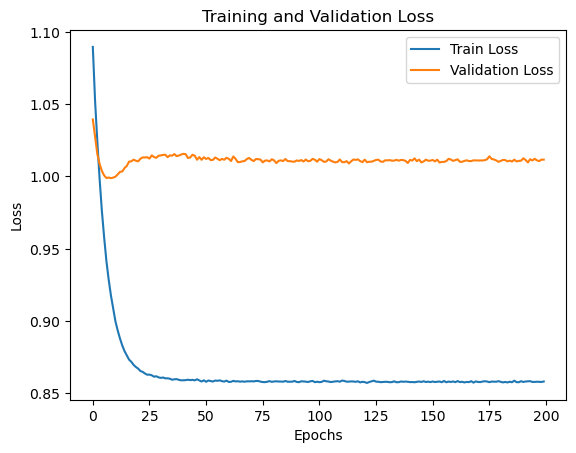

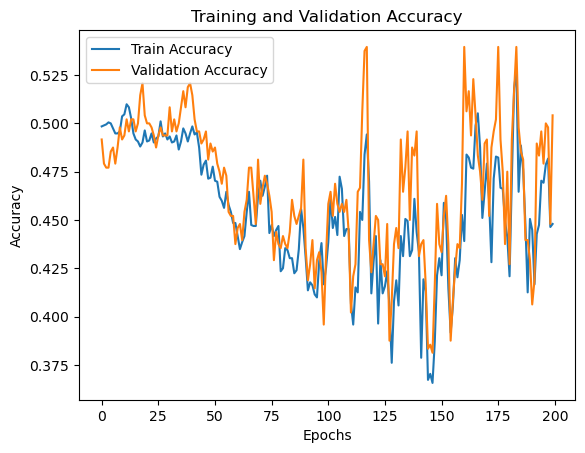

16/16 [==============================] - 0s 3ms/step - loss: 0.9978 - categorical_accuracy: 0.4556
Test Loss: 0.9978073835372925, Test Accuracy: 0.45562130212783813


In [4]:
# # accuracy 폭망
# from tensorflow.keras.models import Sequential
# from tensorflow.keras import layers
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers.experimental import RandomFourierFeatures

# model = Sequential(
#     [
#         layers.Input(shape=(12000,)),
#         RandomFourierFeatures(
#             output_dim=128, scale=0.1, kernel_initializer="gaussian"
#         ),
#         layers.Flatten(),
#         layers.Dense(units=2),
#     ]
# )

# model.compile(
#     optimizer=Adam(learning_rate=1e-3),
#     loss='hinge',
#     metrics=['categorical_accuracy'],
# )

# # # 데이터 정규화
# # x_train = (x_train - x_train.mean()) / x_train.std()
# # x_valid = (x_valid - x_valid.mean()) / x_valid.std()

# # 모델 훈련
# history = model.fit(x_train, y_train, epochs=200, batch_size=16, validation_split=0.2)

# # 손실 그래프
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# # 정확도 그래프
# plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# test_loss, test_accuracy = model.evaluate(x_test, y_test)
# print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

In [70]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# # SVM 모델 초기화
# svm_model = SVC(kernel='linear')  # 선형 커널 사용, 복잡한 경우에는 다른 커널 사용 가능

# # 데이터 학습
# svm_model.fit(x_train, y_train)

# # 훈련 및 검증 세트에 대한 예측
# train_pred = svm_model.predict(x_train)
# valid_pred = svm_model.predict(x_valid)

# # 정확도 출력
# train_accuracy = accuracy_score(y_train, train_pred)
# valid_accuracy = accuracy_score(y_valid, valid_pred)

# print(f'Training Accuracy: {train_accuracy}')
# print(f'Validation Accuracy: {valid_accuracy}')


In [5]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.001
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 20
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

clf.save_model('model.txt')

y_pred=clf.predict(x_valid)

for i in range(0,99):
    if y_pred[i]>=.5:      
       y_pred[i]=1
    else:  
       y_pred[i]=0

y_pred_binary = [1 if val >= 0.5 else 0 for val in y_pred]

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_pred_binary)

# Accuracy
accuracy = accuracy_score(y_pred_binary, y_valid)

print(cm)
print(accuracy)



[LightGBM] [Info] Number of positive: 1200, number of negative: 1200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.332856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060000
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 12000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[[249 151]
 [ 65 335]]
0.73


In [73]:
data_list = []

data1 = "D:\\Dataset\\#2_error detection\\기계시설물 고장 예지 센서\\Validation\\vibration\\vibration\\2.2kW\\dataset\\정상\\STFMK-20201105-LW15-2055_20201125_141245_004.csv"
data2 = "D:\\Dataset\\#2_error detection\\기계시설물 고장 예지 센서\\Validation\\vibration\\vibration\\2.2kW\\dataset\\정상\\STFMK-20201105-LW15-2055_20201125_141309_004.csv"
data3 = "D:\\Dataset\\#2_error detection\\기계시설물 고장 예지 센서\\Validation\\vibration\\vibration\\2.2kW\\dataset\\벨트느슨함\\STFMK-20201105-LW19-3456_20201128_090128_004.csv"

data_list.append(data1)
data_list.append(data2)
data_list.append(data3)


for data_path in data_list:
    print(os.path.basename(data_path))
    data = pd.read_csv(data_path, skiprows=lambda x: x < 8, usecols=[1])
    data = data.T

    prediction = clf.predict(data)
    if prediction > 0.5 :
        print("벨트 느슨함")
    else:
        print("정상")

STFMK-20201105-LW15-2055_20201125_141245_004.csv
정상
STFMK-20201105-LW15-2055_20201125_141309_004.csv
정상
STFMK-20201105-LW19-3456_20201128_090128_004.csv
벨트 느슨함


In [ ]:
# # LSTM 모델 훈련
# model = Sequential()
# model.add(SimpleRNN(units=100, activation='relu', input_shape=(1199, 1)))
# model.add(Dense(units=1, activation='sigmoid'))

# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_valid, y_valid))

# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# test_loss, test_accuracy = model.evaluate(x_test, y_test)
# print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

In [ ]:
# # Build the RNN model
# model = Sequential()
# model.add(SimpleRNN(units=50, activation='relu', input_shape=(12000, 1)))
# model.add(Dense(units=1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # LSTM 모델 훈련
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_valid, y_valid))

# # 손실 그래프
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# # 정확도 그래프
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(x_test, y_test)
# print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

In [ ]:
# # Build the RNN model with GRU
# model = Sequential()
# model.add(GRU(units=200, activation='relu', input_shape=(12000, 1)))
# model.add(Dense(units=1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # GRU 모델 훈련
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_valid, y_valid))

# # 손실 그래프
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


# # 정확도 그래프
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy') 
# plt.legend()
# plt.show()

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(x_test, y_test)
# print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')